# Полносвязная нейронная сеть

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

Скачивание датасета

In [28]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


Стандартизация входных данных. Функция to_categorical превращает целое число в вектор размерностью 10.

In [29]:
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Отображение первых 25 изображений из обучающей выборки

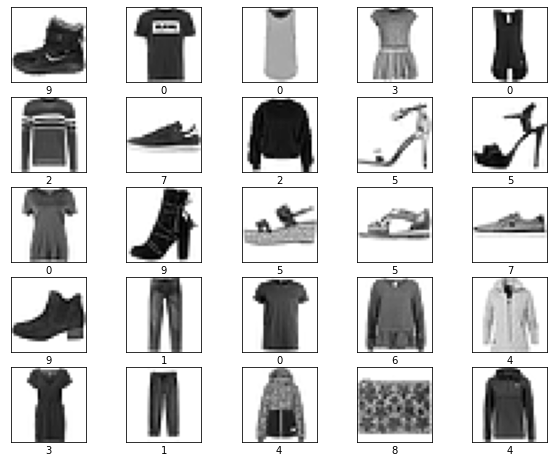

In [38]:
plt.figure(figsize=(10,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

plt.show()

Создание модели с одним скрытым слоем

In [31]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Первый слой Flatten преобразует формат изображения из двумерного массива (28 на 28 пикселей) в одномерный (размерностью 28 * 28 = 784 пикселя). Слой извлекает строки пикселей из изображения и выстраивает их в один ряд. Этот слой не имеет параметров для обучения; он только переформатирует данные.

Далее нейросеть содержит два полносвязных слоя Dense. Первый Dense слой состоит из 128 нейронов и имеет функцию активации relu<span>*</span>. Второй - выходной слой - 10-узловой с функцией активации softmax<span>*</span>. Слой возвращает массив из 10 вероятностных оценок дающих в сумме 1. Каждый нейрон содержит оценку, указывающую вероятность принадлежности изображения к одному из 10 классов.

<span>*</span>Функция активации relu выбрана, так как она проста в вычислениях и нелинейна. softmax удобно использовать в работе с вероятностями, так как она подобно сигмоиде возвращает значения в пределах от 0 до 1, а также сумма результатов будет равна 1.

In [32]:
print(model.summary()) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


Компиляция нейронной сети с оптимизатором adam, в качестве функции потерь используется категориальная кросс-энтропия, т.к. из-за свойств логарифма она лучше работает с вероятностями. Метрика accuracy равна доле правильно классифицированных изображений.

In [33]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [43]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2873 - accuracy: 0.8933 - val_loss: 0.3326 - val_accuracy: 0.8809
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2748 - accuracy: 0.8971 - val_loss: 0.3187 - val_accuracy: 0.8853
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2649 - accuracy: 0.9015 - val_loss: 0.3196 - val_accuracy: 0.8880
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2532 - accuracy: 0.9063 - val_loss: 0.3186 - val_accuracy: 0.8883
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2421 - accuracy: 0.9117 - val_loss: 0.3317 - val_accuracy: 0.8875
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2378 - accuracy: 0.9126 - val_loss: 0.3254 - val_accuracy: 0.8860
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2272 - accuracy: 0.9155 - val_loss: 0.3199 - val_accuracy:

[0.344948410987854, 0.8851000070571899]

Как видим, такая модель достигает точности <b>около 88%</b>

[[1.74031826e-04 6.55327028e-08 7.31670558e-02 1.71044515e-03
  9.13238883e-01 1.84503024e-10 1.15999598e-02 2.24321620e-11
  1.09497552e-04 1.05310885e-10]]
4


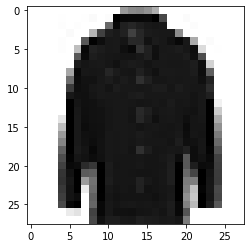

In [44]:
n = 14
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [45]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

(10000,)
[9 2 1 1 0 1 4 6 5 7 4 5 8 3 4 1 2 2 8 0]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


[ True  True  True  True False  True  True  True  True  True]
(1149, 28, 28)


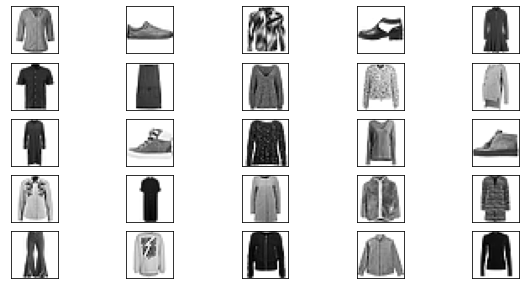

In [46]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()

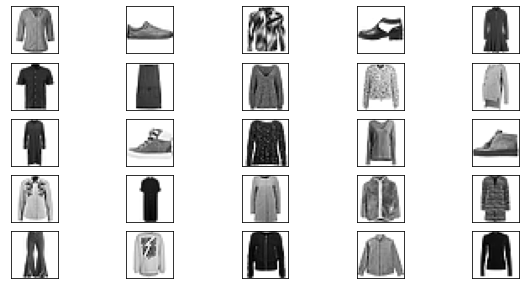

In [47]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()

# Сверточная нейронная сеть

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print( x_train.shape )

model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

# print(model.summary())      # вывод структуры НС в консоль

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

(60000, 28, 28, 1)
Epoch 1/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.4168 - accuracy: 0.8500 - val_loss: 0.3675 - val_accuracy: 0.8673
Epoch 2/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.2740 - accuracy: 0.9005 - val_loss: 0.2689 - val_accuracy: 0.9029
Epoch 3/5
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2289 - accuracy: 0.9162 - val_loss: 0.2779 - val_accuracy: 0.8981
Epoch 4/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1970 - accuracy: 0.9281 - val_loss: 0.2412 - val_accuracy: 0.9134
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.2336 - accuracy: 0.9167


[0.2335854470729828, 0.916700005531311]